In [1]:
#importations
from matplotlib import pyplot as plt
import numpy as np
#import os; os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import cv2
import glob
import pydot
from IPython.display import SVG
from keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
NUMBER_OF_CLASSES = 14
CLASSES = ("+", "-", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "*", "x")

In [3]:
#FONCTIONS

#LOAD THE MODEL
def loadModel(path):
    model = load_model(path)
    model.summary()
    return model
    

#GET THE IMAGE OF THE EQUATION
def getDigitBoundingBoxesFromEquation(equation_image_path):
    equation = cv2.imread(equation_image_path, 0)
    equation = cv2.bitwise_not(equation)
    equation2, contours, hierarchy = cv2.findContours(equation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)
    boundingBoxes = []
    for contour in contours :
        boundingBox = cv2.boundingRect(contour)
        boundingBoxes.append(boundingBox)

    boundingBoxes = np.array(boundingBoxes)
    #print(boundingBoxes)
    boundingBoxes = boundingBoxes[boundingBoxes[:,0].argsort()]
    #print(boundingBoxes)
    return equation, boundingBoxes


#CROP THE DIGIT WITH RESPECT TO THE BOUNDING BOX PROVIDED IN THE PARAMETERS 
def cropDigit(boundingBox, equation):
    x, y, w, h = boundingBox
    digit = equation[y-10:y+h+10 , x-10:x+w+10]
    digit = cv2.bitwise_not(digit)
    digit = cv2.resize(digit, (55, 55), interpolation = cv2.INTER_CUBIC)
    kernel = np.ones((2,2),np.uint8)
    digit = cv2.erode(digit,kernel,iterations = 1)
    #print(digit)
    plt.imshow(digit, cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return digit
    

#CONVERT A PREDICTION (VECTOR) TO A STRING EQUATION
def predictions2StringEquation(predictions):
    equation = ""
    predictions = predictions.tolist()
    for i in range(len(predictions)):
        print("Predicted : " + CLASSES[predictions[i].index(1)])
        equation += CLASSES[predictions[i].index(1)]
    return equation

#CONVERT A STRING EQUATION TO A FUNCTION
def string2Func(string):
    
    def func(x):
        return eval(string)

    return func

#PLOT THE FUNCTION
def plotFunction(function):
    x = np.linspace(-1000, 1000, 100)
    plt.plot(x, function(x))
    plt.show()

In [4]:
model = loadModel('digit_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 55, 55, 1)         0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 59, 59, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 6)         156       
_________________________________________________________________
activation_5 (Activation)    (None, 55, 55, 6)         0         
_________________________________________________________________
average_pool0 (AveragePoolin (None, 27, 27, 6)         0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 31, 31, 6)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 16)        2416      
__________

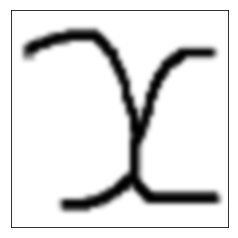

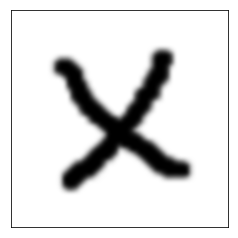

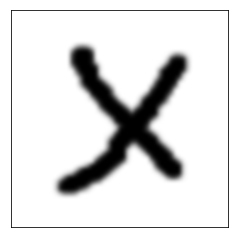

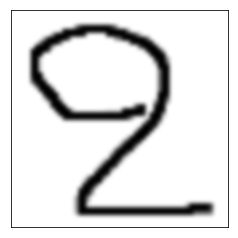

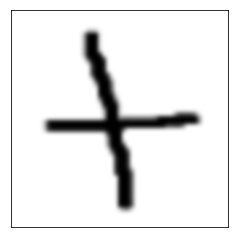

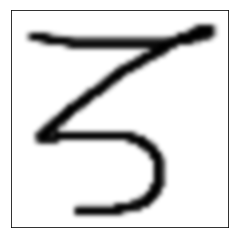

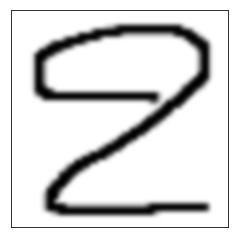

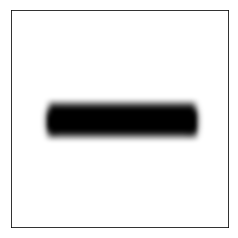

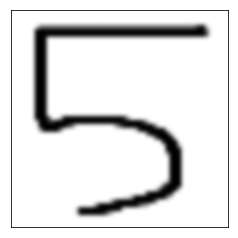

[0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Predicted : x
Predicted : *
Predicted : *
Predicted : 9
Predicted : +
Predicted : 3
Predicted : 2
Predicted : -
Predicted : 5
L'equation a afficher :x**9+32-5
Predicted : x
Predicted : *
Predicted : *
Predicted : 9
Predicted : +
Predicted : 3
Predicted : 2
Predicted : -
Predicted : 5


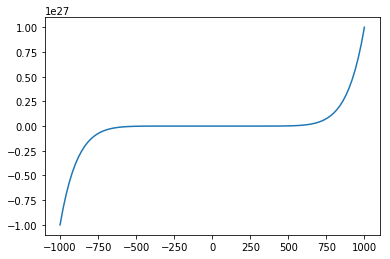

In [6]:
equation, boundingBoxes = getDigitBoundingBoxesFromEquation("sample/Equation/equation.png")

#CETTE PARTIE DU CODE CONCERNE L'EXTRACTION DES SYMBOLES DE L'EQUATION ET LEUR PREDICTION
digits = np.array([])
digits = np.array([cropDigit(b, equation) for b in boundingBoxes])
digits = np.expand_dims(digits, axis=3)
digits = digits/255
preds = model.predict(digits)
preds = (preds > 0.5).astype(int)
for i in preds:
    print(i)

#AFFICHAGE DE LA FONCTION
print("L'equation a afficher :" + predictions2StringEquation(preds))
plotFunction(string2Func(predictions2StringEquation(preds)))
    
    
    